<a href="https://colab.research.google.com/github/BugPersonality/ML/blob/main/DubovLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [33]:
import numpy as np

def linan(s1, s2):
    line1 = list(map(int, s1.split(" ")))
    line2 = list(map(int, s2.split(" ")))

    leftPart = np.array([ [line1[0], line1[1]], [line2[0], line2[1]] ]) # numpy matrix (left part of a system)
    rightPart = np.array([line1[2], line2[2]])                          # numpy vector (right part of a system)

    solution = np.linalg.solve(leftPart, rightPart)

    return f"{solution[0]} {solution[1]}"

linan("1 2 3", "1 3 1")

'7.0 -2.0'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [108]:
def decorate_matrix(n):
    matrix = np.zeros((n, n), dtype=np.int64)
    matrix[:, 0] =  1       # left
    matrix[:, n - 1] = 1    # right
    matrix[0, :] =  1       # top
    matrix[n - 1, :] = 1    # bottom
    return matrix

decorate_matrix(6)

array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [120]:
from scipy.optimize import minimize

def f(x, a = 3, b = 4):
    return pow(x + a, 2) - b

def g(x):
    return abs(f(x))

def findMinimum(func):                  # find minimum by using scipy.optimize.minimize
    return minimize(func, x0=0)

def goldenSlice(func, a, b, eps=0.01):  # find minimum by using Golden section search
    def getOracul(callOracul, func):
        callOracul[0] += 1
        return func

    iterations = 1
    callOracul = [0]

    t1 = 0.381966
    t2 = 1 - t1

    x1 = a + (b - a) * t1
    x2 = a + (b - a) * t2

    f1 = getOracul(callOracul, func)(x1 - eps)
    f2 = getOracul(callOracul, func)(x2 + eps)

    while abs(b - a) > eps:

        if (f1 < f2):
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (b - a) * t1
            f1 = getOracul(callOracul, func)(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) * t2
            f2 = getOracul(callOracul, func)(x2)

        iterations += 1 
      
    answ = (a + b) / 2

    return ((answ, func(answ)), iterations, callOracul)

print(f"scipy.optimize.minimize f(x)  | min = {findMinimum(f).x[0]}")
print(f"scipy.optimize.minimize f(g)  | min = {findMinimum(g).x[0]}")

print(f"goldenSlice mtehod      f(x)  | min = {goldenSlice(f, -100, 100)[0][0]}")
print(f"goldenSlice mtehod      g(x)  | min = {goldenSlice(g, -100, 100)[0][0]}")

scipy.optimize.minimize f(x)  | min = -2.9999999840660854
scipy.optimize.minimize f(g)  | min = -1.000000007128943
goldenSlice mtehod      f(x)  | min = -2.9986552145750194
goldenSlice mtehod      g(x)  | min = -0.9999487333718523


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

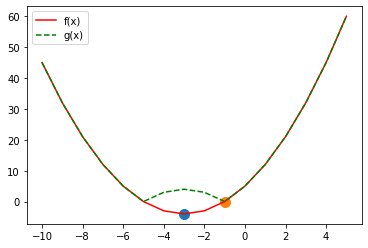

In [123]:
import matplotlib.pyplot as plt

def plot_function():
    x = range(-10, 6)
    y = list(map(f, x))
    y1 = list(map(g, x))
        
    fig, ax = plt.subplots()

    ax.plot(x, y, "r", label="f(x)")
    ax.plot(x, y1, "g--", label="g(x)")
    ax.legend()

    fMin = goldenSlice(f, -100, 100)[0]
    gMin = goldenSlice(g, -100, 100)[0]

    ax.scatter(fMin[0], fMin[1], s=100)
    ax.scatter(gMin[0], gMin[1], s=100)
    
    plt.show()
    
plot_function()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [145]:
import math

def poisson(lambda_, k):
    return (pow(lambda_, k) / math.factorial(k)) * math.exp(-lambda_)

def printProbabilitys():
    firstProbability =  1 - poisson(1000 * pow(1/2, 9), 0)
    secondProbability = 1 - poisson(1000 * pow(1/2, 7), 0)
    thirdProbability = poisson(pow(1/2, 9) * 1000, 3)  
    
    print(f"probability of 10 times on one side: {firstProbability}")
    print(f"probability of 8 times on one side: {secondProbability}")
    print(f"3 man toss coin 10 on times one side: {thirdProbability}")

printProbabilitys()


probability of 10 times on one side: 0.8581698409126575
probability of 8 times on one side: 0.9995953548306737
3 man toss coin 10 on times one side: 0.17611950522579567
